In [24]:
import imutils
from imutils import face_utils
from imutils import paths
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

#  이미지 업로드 및 전처리

In [42]:
frame = cv2.imread("pic/face2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#  페이스 예측 1
- Face_recognition 모듈 사용
- 사각형으로 표시

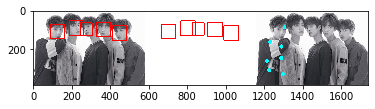

True

In [60]:
frame = cv2.imread("pic/face2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#모두 0으로 되어 있는 빈 Canvas(검정색), 3차원(RGB)
blank_img = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
blank_img[:, :] = [255, 255, 255]

blank_img2 = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
blank_img2[:, :] = [255, 255, 255]
blank_img2 = frame.copy()


face_locations = face_recognition.face_locations(frame) # HOG 기반으로 얼굴 좌표 추출, top, right, bottom, left으로 값들을 반환
for face_location in face_locations:
    top, right, bottom, left = face_location
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
    cv2.rectangle(frame, (left, top),  (right, bottom), (0, 0, 255), 3)
    cv2.rectangle(blank_img, (left, top),  (right, bottom), (0, 0, 255), 3)
    cv2.circle(blank_img2, (top, right), 10, (255, 255, 0), -1)
    cv2.circle(blank_img2, (bottom, left), 10, (255, 255, 0), -1)

imshow('',np.hstack([ frame, blank_img,blank_img2]))
cv2.imwrite('LAB_face_1.jpg',np.hstack([ frame, blank_img,blank_img2]) )

#  페이스 예측 2
- dlib 모듈 사용을 하며 아래 그림에 명시된 인덱스 로 꼭지점이 그려진다.
<img src="pic/facial_landmarks_68markup.jpg" alt="facial_landmarks_68markup" style="zoom:30%;" />

Detection 0: Left: 413 Top: 85 Right: 485 Bottom: 157
Detection 1: Left: 93 Top: 77 Right: 165 Bottom: 149
Detection 2: Left: 333 Top: 69 Right: 405 Bottom: 141
Detection 3: Left: 189 Top: 53 Right: 261 Bottom: 125
Detection 4: Left: 245 Top: 61 Right: 317 Bottom: 133


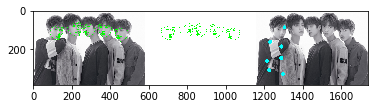

True

In [61]:
frame = cv2.imread("pic/face2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#모두 0으로 되어 있는 빈 Canvas(검정색), 3차원(RGB)
blank_img = np.zeros((frame.shape[0], frame.shape[1], 3), np.uint8)
blank_img[:, :] = [255, 255, 255]

predictor = dlib.shape_predictor("cfg_file/face_recognition/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

rects = detector(gray, 0)  #검출된 얼굴 부위 별 점들의 x,y 좌표를 반환
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d) # 이미지, 좌표
        shape = face_utils.shape_to_np(shape) # 넘파이 식으로 변환
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)
            cv2.circle(blank_img, (x, y), 2, (0, 255, 0), -1)
imshow('',np.hstack([ frame, blank_img,blank_img2]))
cv2.imwrite('LAB_face_2.jpg',np.hstack([ frame, blank_img]) )